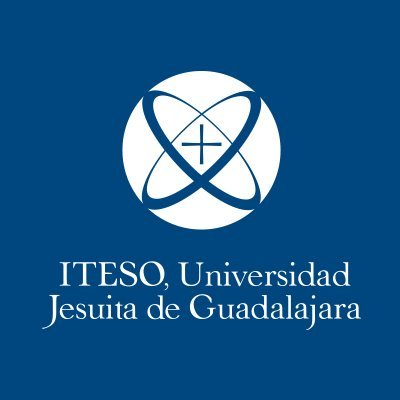

## <center> Quantitative Finance S. 2022 <center/>
## <center> Professor José Mario Zárate <center/>
### <center> Homework 5 <center/>

### <center> Díaz Verduzco Alexia Marisol IF720500 <center/>
### <center> González Reyes Christian Eduardo IF721850 <center/>
### <center> López Lazareno Diego Alberto IF722100 <center/>
### <center> Romero Riggen Santiago IF715099 <center/>


## Homework 5.1


In [1]:
# Required libraries
import yfinance as yf
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt

# Functions
def stocksModel(ticker : "Ticker symbol", start : "Start date", end : "End date", N : "Number of scenarios"):
    """
    stocksModel simulates a stock's behavior.
    
    """
    
    # Data download
    data = yf.download(ticker, start = start, end = end, progress = False)["Adj Close"]
    returns = data.pct_change().dropna()
    mu, sigma = returns.mean(), returns.std()
    S0 = data.iloc[0]
    
    # Simulation
    datan = pd.DataFrame(np.zeros((len(data), N)))
    datan["Adj Close"] = data.values

    for j in range(N):
        simulation = [S0]
        for i in range(len(data) - 1):
            simulation.append(simulation[-1] * np.exp((mu - sigma ** 2 / 2) + sigma * np.random.normal()))

        datan[j] = simulation
        
    datan.index = data.index
    
    return datan


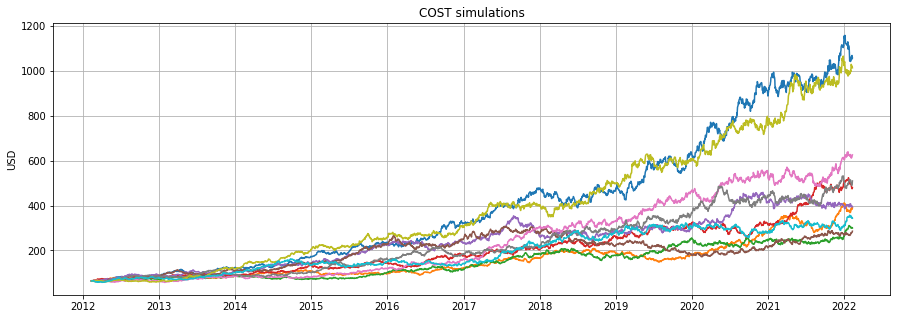

In [2]:
ticker = "COST"
end = dt.datetime.today()
start = end - dt.timedelta(10 * 365)
results = stocksModel(ticker, start, end, 10)

plt.figure(figsize = (15, 5))
plt.title(ticker + " simulations")
plt.plot(results.iloc[:, :-1])
plt.grid()
plt.ylabel("USD");